<a href="https://colab.research.google.com/github/leandropsouza1/pos-ia/blob/main/regrecao_linear_composta/regressao_linear_composta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 🚢 Importação das Bibliotecas

In [53]:
import os
import gc

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


### Comandos para apagar o DatSet (testes)

In [82]:
#del(ds)
#gc.collect()

12953

### 📶 Configurando o MatPlotLib para os gráficos serem exebidos logo depois dos comandos e ajustado a formatação das fontes

In [83]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### 🌱 Definindo uma semente para a base

In [84]:
np.random.seed(42)

### 📚 Carregando o DataSet de Casas

In [85]:
ds = pd.read_csv("/content/sample_data/housing.csv")


## 🤓 Entendendo a base de dados e verificandos os dados que temos para trabalhar

### Verificando a estrutura da do DataSet

In [86]:
ds.shape

(20640, 10)

In [87]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Observação


*   O campo "total_bedrooms" parece ter dados null e precisamos aprofunda a verificação.


### Tendo uma visão básica dos dados

In [88]:
ds.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Analisando o conteudo da variável de texto

In [89]:
set(ds['ocean_proximity'])

{'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

### Verificando a quantidade de registros por categoria

In [90]:
ds['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


### Analisando as estatística das variáveis

In [91]:
ds.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Plotando histograma das variáveis para visualizarmo a distribuição numerica dos dados:

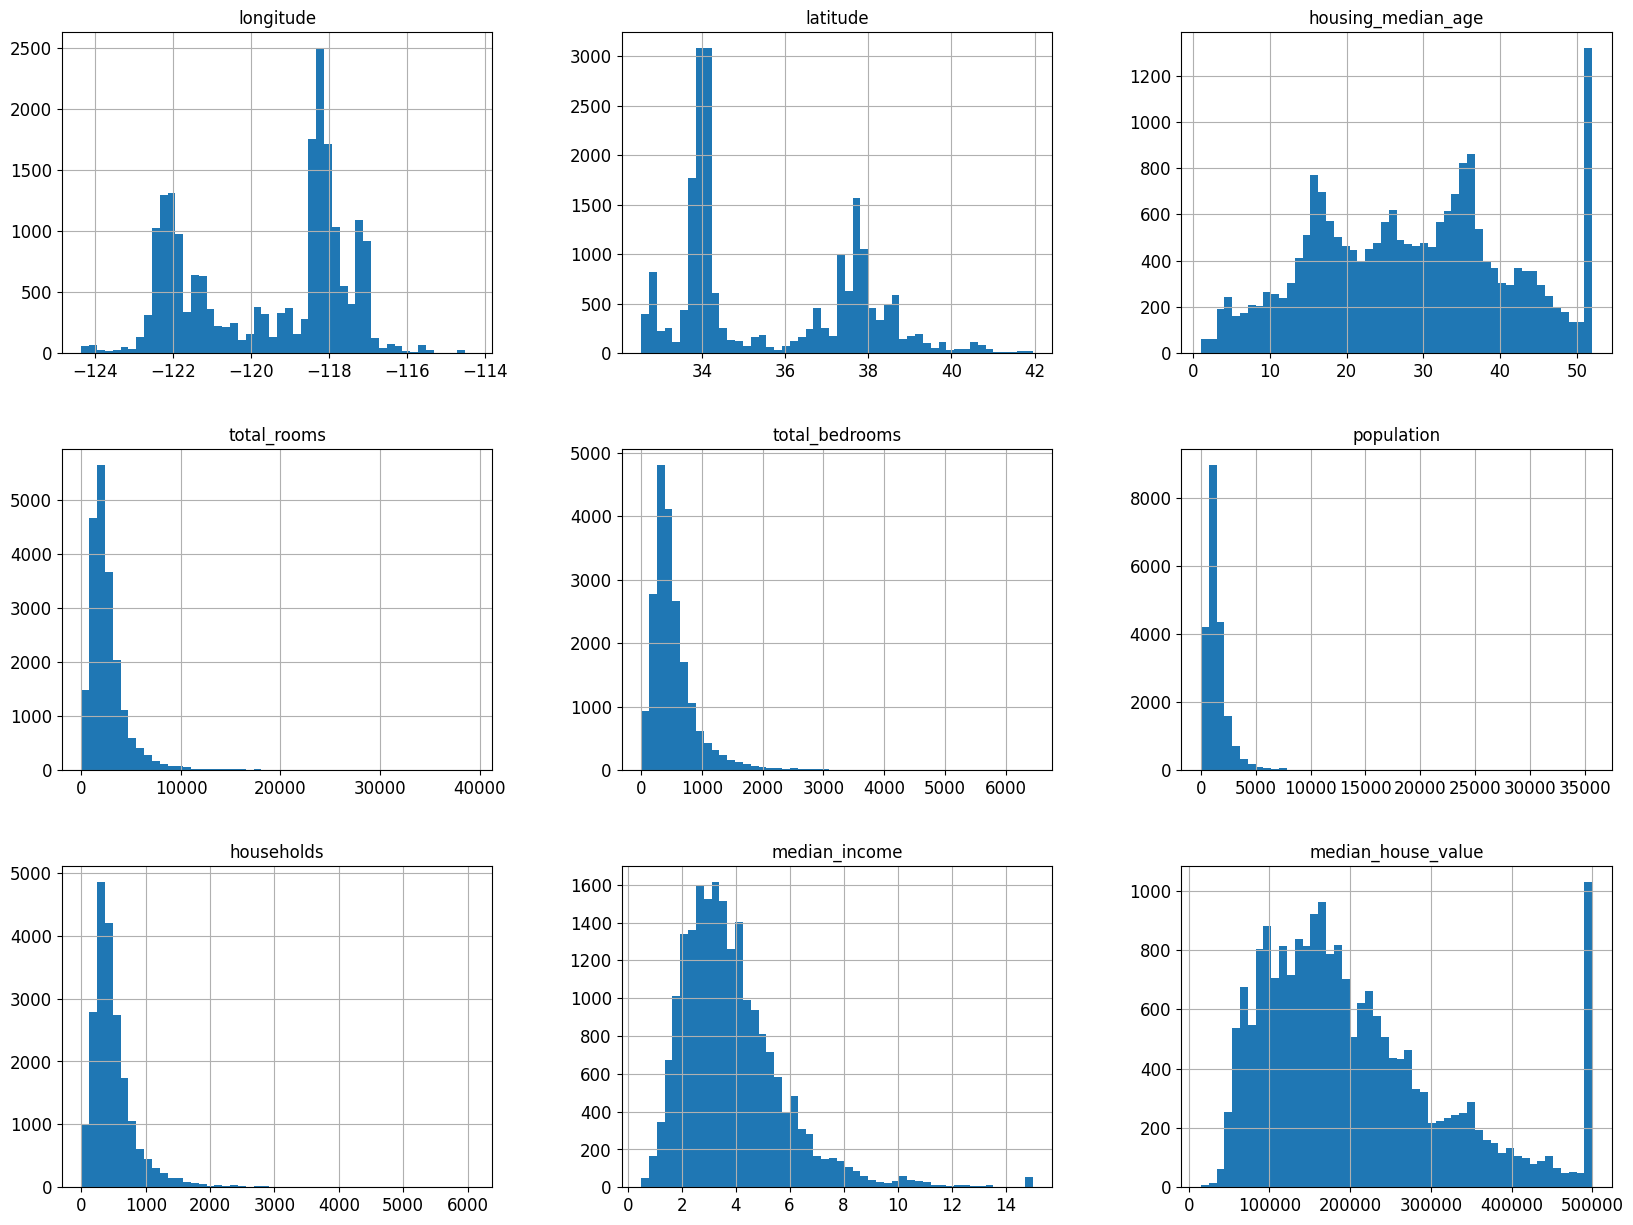

In [92]:
ds.hist(bins=50, figsize=(20,15))
plt.show()

Observações:


*   "median_income" não parece estar expresso em dollar;
*   "median_house_value" (nossa target) parece estar limitada a casas com volar até 500k - Importante validar com a área de negocio sobre esse dado.



## Separando as bases em treino e teste

In [93]:
df_train, df_test = train_test_split(ds, test_size = 0.2, random_state = 7)

### Validando os volumes

In [94]:
print (f"""Treinamento: {len(df_train)} \nTeste: {len(df_test)}""")

Treinamento: 16512 
Teste: 4128


### Criando catégoria de média de renda anual

Estamos supondo que foi informado pela área de negocio que a a **média de renda anual** é uma variável muito importante. Então vamos que garantir que essa variável tenha valores representativos em ambos os casos (Teste e Treino)

In [95]:
ds['income_cat'] = np.ceil(ds['median_income'] / 1.5)

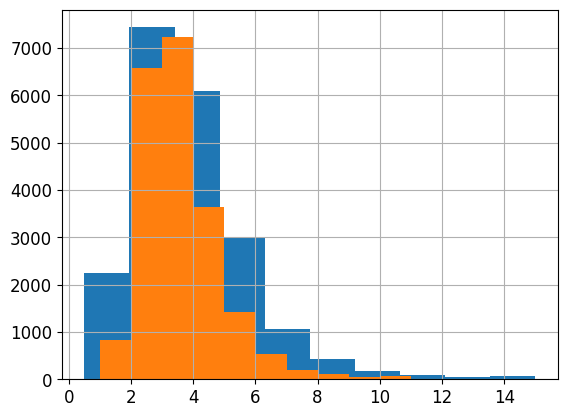

In [97]:
ds['median_income'].hist()
ds['income_cat'].hist()
plt.show()

In [98]:
# Ajustando o rotulamento para que todos os valores que forem maiores do que 5, serão substituidos por 5
ds['income_cat'].where(ds['income_cat'] < 5, 5.0, inplace=True)

/tmp/ipython-input-98-2247181521.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds['income_cat'].where(ds['income_cat'] < 5, 5.0, inplace=True)


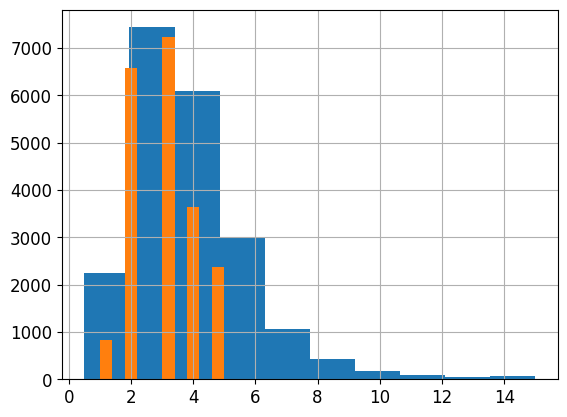

In [81]:
ds['median_income'].hist()
ds['income_cat'].hist()
plt.show()

### Seprando os valores em categorias

In [73]:
ds['income_cat'] = pd.cut(ds['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

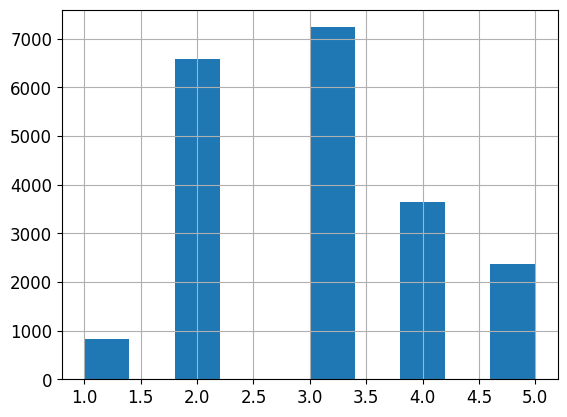

In [80]:
ds['income_cat'].hist()
plt.show()

In [79]:
ds["income_cat"].value_counts()

,count
income_cat,
3,7236
2,6581
4,3639
5,2362
1,822
